In [1]:
import numpy as np
import os
import subprocess as sp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.ticker import StrMethodFormatter
import pandas as pd
import matplotlib as mpl
import sys

In [2]:
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [12]:
def preparePlots(rMax=1e0, tMax=5e0, Delta=1e-2, tminLog=1e-6, DeltaCutOff=5e-2):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
  ax1.set_ylabel(r'$r_M$', fontsize=20)

  for ax in [ax1, ax2]:
    ax.tick_params(axis='both', which='major', labelsize=20)

  for ax in [ax1, ax2]:
    ax.set_xlabel(r'$t$', fontsize=20)
  
  ax1.set_xlim([0, tMax])
  ax1.set_ylim([0, rMax])

  ## ax2 is the log-log plot of ax1
  # ax2.set_xscale('log')
  ax2.set_yscale('log')
  ax2.set_xlim([0., tMax])
  ax2.set_ylim([Delta/100, 1.0])
  ax2.plot([tminLog, tMax], [Delta, Delta], 'k--', lw=3)

  return ax1, ax2

def readData(filename):
  df = pd.read_csv(filename, sep=' ', header=None, skiprows=1)
  # row 0 contains the header
  df = df.drop(0, axis=0)
  df.columns = ['i', 'dt', 't', 'ke', 'rMin', 'rMax']
  # print(df.head())
  # sort df by rM in descending order

  rM = df['rMax'].values.astype(float)
  t = df['t'].values.astype(float)
  # sort both rM and t based on t
  idx = np.argsort(t)
  t = t[idx]
  rM = rM[idx]
  return t, rM

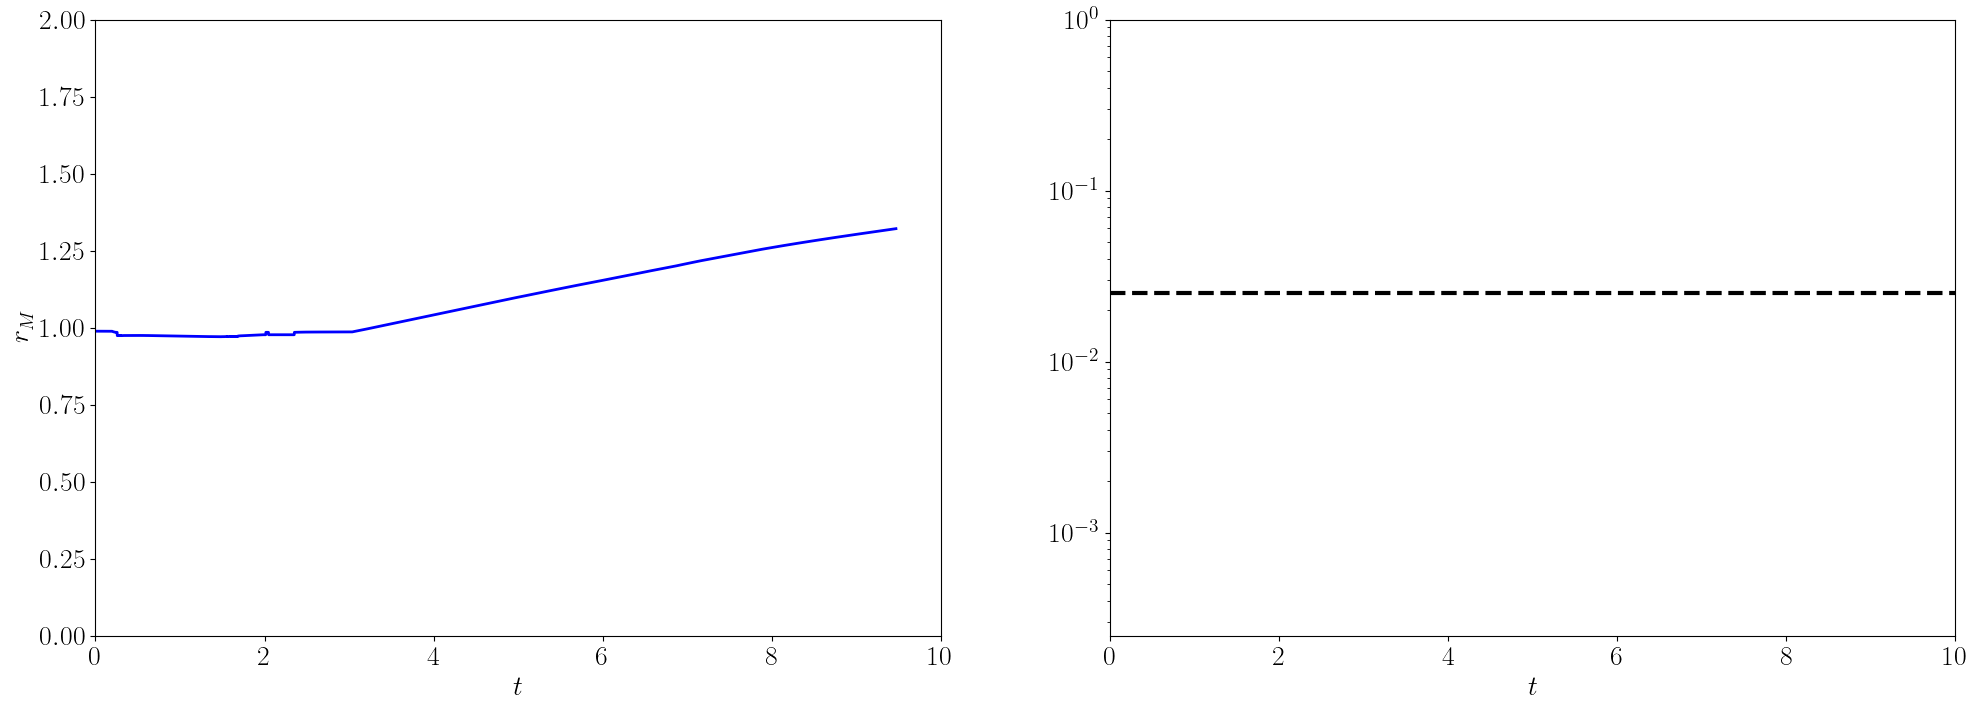

In [18]:
Delta = 1.0/40
DeltaCutOff = Delta
Ec = [0.0]

ax1, ax2 = preparePlots(rMax=2e0, tMax=1e1, Delta=Delta, tminLog=1e-6, DeltaCutOff=DeltaCutOff)
t, rM = readData('die-swell_VE/log-die-swell.dat')
ax1.plot(t, rM, 'b-', lw=2, label=r'$Ec = %f$'%Ec[0])
